In [392]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [393]:
king_county = pd.read_csv("kc_house_data.csv")

In [394]:
popln = pd.read_csv("zicode_pop.csv")

In [395]:
print("This project intends to apply ML techiniques and EDA to identify the zipcodes in King County, WA and how are their prices.I will be using two data sets : king_couty data set from kaggle and a zipcodes with populatin data from king county website.")

This project intends to apply ML techiniques and EDA to identify the zipcodes in King County, WA and how are their prices.I will be using two data sets : king_couty data set from kaggle and a zipcodes with populatin data from king county website.


In [396]:
print("The king county data has " + str(king_county.shape[0]) + " rows and " + str(king_county.shape[1]) + " columns.")

The king county data has 21613 rows and 21 columns.


In [397]:
print("Similarly, the zipcodes population data has " + str(popln.shape[0]) + " rows and " + str(popln.shape[1]) + " columns.")

Similarly, the zipcodes population data has 120 rows and 6 columns.


In [398]:
print("The data sets will be joined on zipcodes")

The data sets will be joined on zipcodes


In [399]:
king_county.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [400]:
popln.head()

,zipcode,Classification,City,Population,Timezone,Area Code(s)
0,98001,General,Auburn,31911,Pacific,253
1,98002,General,Auburn,31647,Pacific,253
2,98003,General,Federal Way,44151,Pacific,253
3,98004,General,Bellevue,27946,Pacific,425
4,98005,General,Bellevue,17714,Pacific,425


In [401]:
#Summaries:
king_county.info() 
popln.info() #correct data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB
<class 'pandas.core

In [402]:
king_county.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [403]:
king_county.isnull().sum() # no null values in king county data
popln.isnull().sum() #no nulls

zipcode           0
Classification    0
City              0
Population        0
Timezone          0
Area Code(s)      0
dtype: int64

In [404]:
king_county.nunique()

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [405]:
popln.nunique()

zipcode           120
Classification      3
City               32
Population         81
Timezone            1
Area Code(s)       13
dtype: int64

In [406]:
king_county['yr_renovated'] = np.where(king_county['yr_renovated'] != 0, 1, king_county['yr_renovated'])
king_county.head() #replace year by 1, if property is renovated, else 0.


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [407]:
#Merge the two data sets
housing_df = pd.merge(king_county, popln, on="zipcode", how ="left")
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 0 to 21612
Data columns (total 26 columns):
id                21613 non-null int64
date              21613 non-null object
price             21613 non-null float64
bedrooms          21613 non-null int64
bathrooms         21613 non-null float64
sqft_living       21613 non-null int64
sqft_lot          21613 non-null int64
floors            21613 non-null float64
waterfront        21613 non-null int64
view              21613 non-null int64
condition         21613 non-null int64
grade             21613 non-null int64
sqft_above        21613 non-null int64
sqft_basement     21613 non-null int64
yr_built          21613 non-null int64
yr_renovated      21613 non-null int64
zipcode           21613 non-null int64
lat               21613 non-null float64
long              21613 non-null float64
sqft_living15     21613 non-null int64
sqft_lot15        21613 non-null int64
Classification    21613 non-null object
City              216

In [408]:
#Dropping irrelevant columns
housing_df = housing_df.drop(['id', 'date', 'lat','long', 'Classification','Timezone', 'sqft_living15', 'sqft_lot15', 'Area Code(s)'], axis=1)

In [409]:
housing_df.columns=map(str. capitalize, housing_df.columns)
housing_df

,Price,Bedrooms,Bathrooms,Sqft_living,Sqft_lot,Floors,Waterfront,View,Condition,Grade,Sqft_above,Sqft_basement,Yr_built,Yr_renovated,Zipcode,City,Population
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,Seattle,24092
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1,98125,Seattle,37081
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,Kenmore,20419
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,Seattle,14770
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,Sammamish,25748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,Seattle,45911
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,Seattle,25922
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,Seattle,26881
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,Issaquah,26141


In [410]:
city_pop = housing_df.groupby(['City','Zipcode'])["Population"].apply(lambda x:x.sum()).reset_index()

In [411]:
city_pop

,City,Zipcode,Population
0,Auburn,98001,11551782
1,Auburn,98002,6297753
2,Auburn,98092,13975416
3,Bellevue,98004,8858882
4,Bellevue,98005,2975952
...,...,...,...
65,Seattle,98199,6240462
66,Snoqualmie,98065,3936690
67,Vashon,98070,1253632
68,Woodinville,98072,6091176


In [412]:
X = housing_df

In [413]:
y = housing_df[['Price']]
y

,Price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0
...,...
21608,360000.0
21609,400000.0
21610,402101.0
21611,400000.0


In [414]:
X = housing_df.drop(['Price'], axis=1) 
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 0 to 21612
Data columns (total 16 columns):
Bedrooms         21613 non-null int64
Bathrooms        21613 non-null float64
Sqft_living      21613 non-null int64
Sqft_lot         21613 non-null int64
Floors           21613 non-null float64
Waterfront       21613 non-null int64
View             21613 non-null int64
Condition        21613 non-null int64
Grade            21613 non-null int64
Sqft_above       21613 non-null int64
Sqft_basement    21613 non-null int64
Yr_built         21613 non-null int64
Yr_renovated     21613 non-null int64
Zipcode          21613 non-null int64
City             21613 non-null object
Population       21613 non-null int64
dtypes: float64(2), int64(13), object(1)
memory usage: 2.8+ MB


In [415]:
from sklearn.model_selection import train_test_split

In [416]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12)

In [417]:
y_test

,Price
2019,275000.0
3435,279000.0
15940,200500.0
9811,750000.0
18665,395000.0
...,...
17756,1320000.0
15053,260000.0
17838,1650000.0
12691,689000.0


''

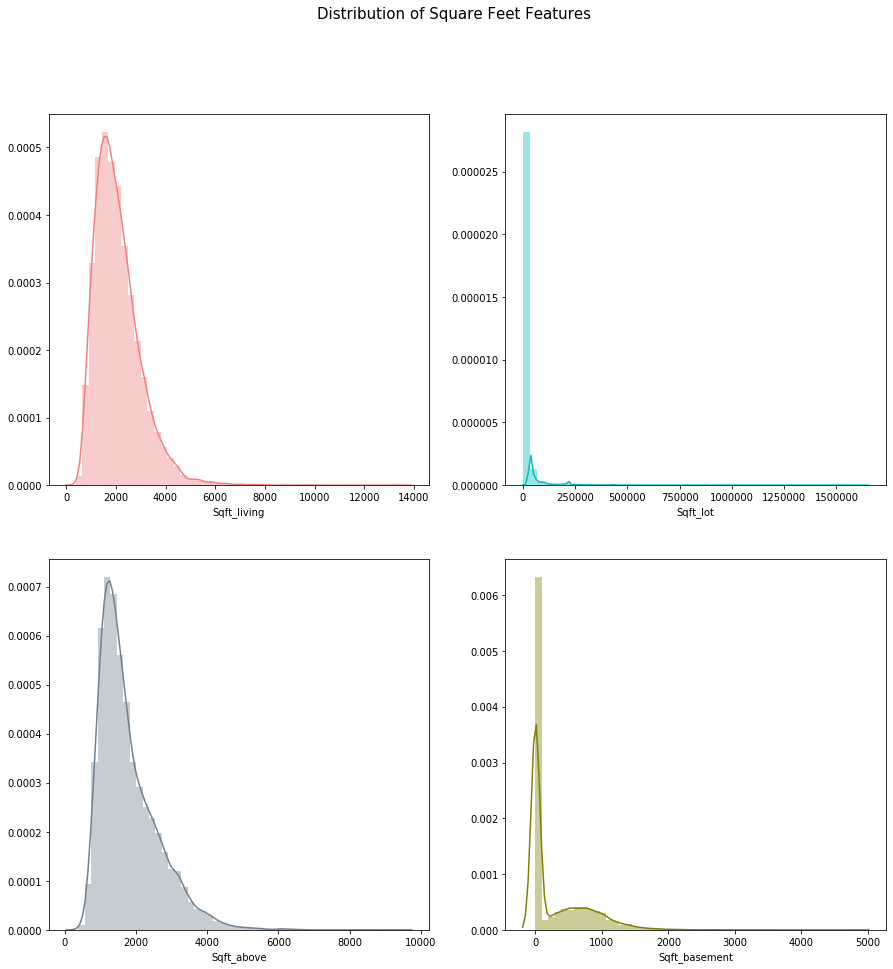

In [354]:
#Visuzalizations for EDA
fig, ax = plt.subplots(2, 2, figsize=(15, 15))
sns.distplot(X_train["Sqft_living"], color = "lightcoral", ax=ax[0,0])
sns.distplot(X_train["Sqft_lot"],color = "c", ax=ax[0,1])
sns.distplot(X_train["Sqft_above"], color = "slategray", ax=ax[1,0])
sns.distplot(X_train["Sqft_basement"],color = "olive", ax=ax[1,1])
fig.suptitle('Distribution of Square Feet Features', fontsize=15)
;

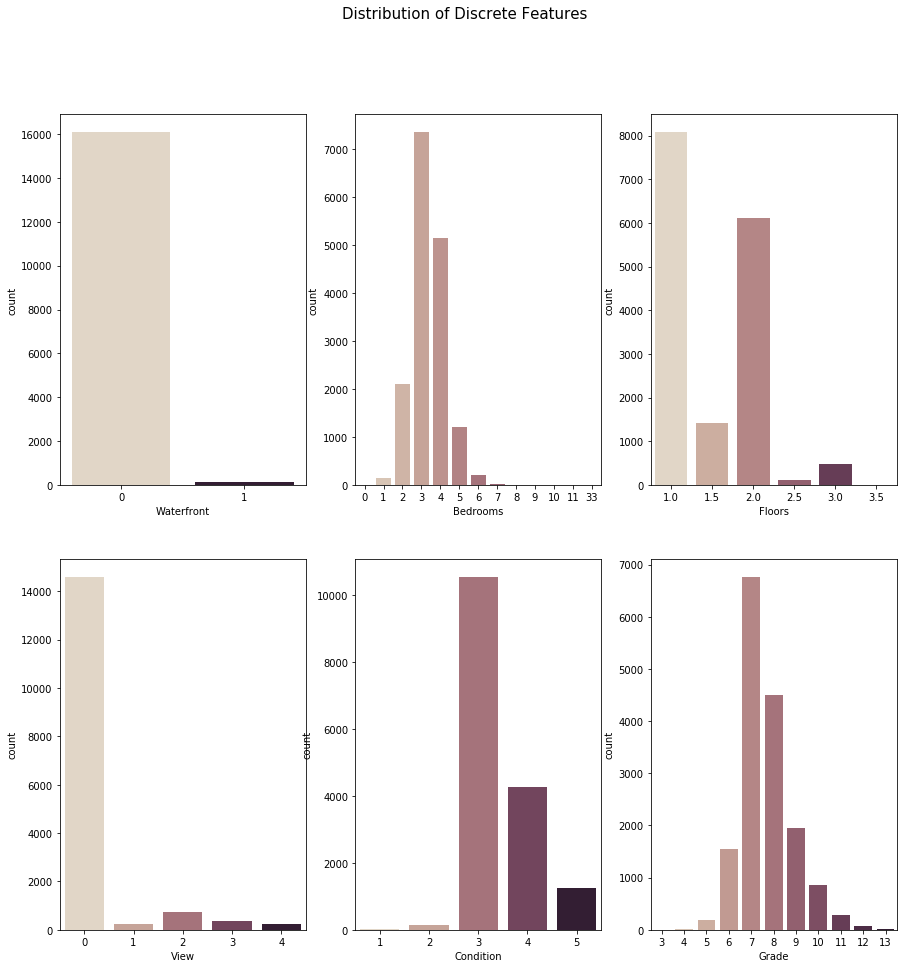

In [355]:
fig, ax = plt.subplots(2, 3, figsize=(15, 15))
sns.catplot(x="Waterfront", kind = "count", palette=("ch:.25"), data=X_train,ax=ax[0,0])
sns.catplot(x="Bedrooms", kind="count", palette="ch:.25", data=X_train,ax=ax[0,1])
sns.catplot(x="Floors", kind="count", palette="ch:.25", data=X_train,ax=ax[0,2])
sns.catplot(x="View", kind = "count", palette="ch:.25", data=X_train,ax=ax[1,0])
sns.catplot(x="Condition", kind = "count", palette="ch:.25", data=X_train,ax=ax[1,1])
sns.catplot(x="Grade", kind = "count", palette="ch:.25", data=X_train,ax=ax[1,2])
fig.suptitle('Distribution of Discrete Features', fontsize=15);
for i in range(2,8): 
    plt.close(i)

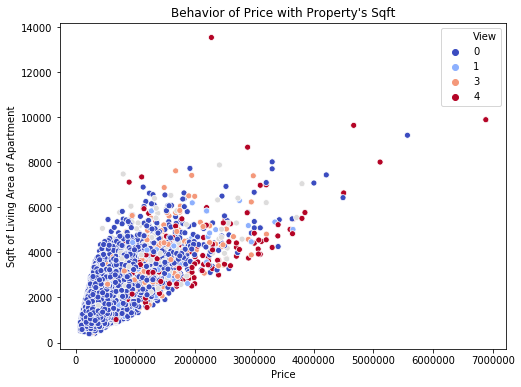

In [356]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_train['Price'],y=X_train["Sqft_living"],hue = X_train["View"], palette ="coolwarm")
plt.title("Behavior of Price with Property's Sqft")
plt.ylabel("Sqft of Living Area of Apartment");

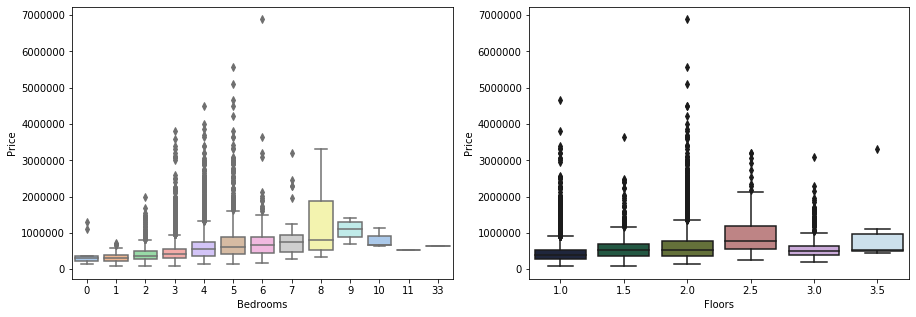

In [357]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=X_train['Bedrooms'],y=y_train['Price'], palette = "pastel", ax=axes[0])
sns.boxplot(x=X_train['Floors'],y=y_train['Price'],palette = ("cubehelix"), ax=axes[1]);

''

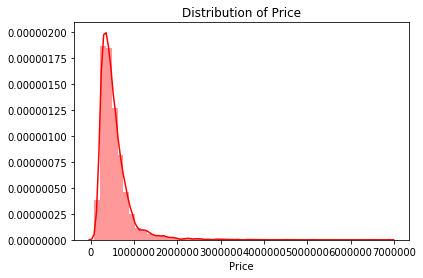

In [358]:
plt.title('Distribution of Price')
sns.distplot(y_train["Price"], color="r")
;

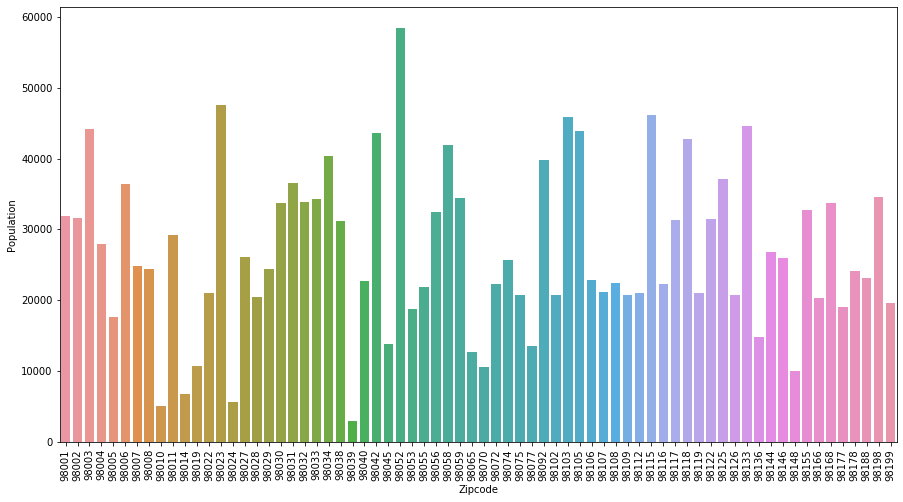

In [359]:
popl_zipcode = X_train.groupby('Zipcode', as_index=False).mean()[['Zipcode','Population']]
plt.figure(figsize=(15,8))
chart = sns.barplot(x='Zipcode', y='Population',data = popl_zipcode)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);